###### 1.00/1.001 Engineering Computation and Data Science
# Problem Set 2
#### Due before March 3rd 2021 11:59 PM

In [1]:
# Useful Relevant Import Statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Boilerplate Answer Declaration
your_answer_here = '{{replace this variable with the your own statement for the correct code. }}'

# If you feel you need to import additional libraries,
# you can do so in the relevant question

## 2.1) What day of the week was 1/1/1970

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


myArray = np.array([1,2,3,4,5,6,7])
mySeries = pd.Series(myArray)

mySeries.index = pd.date_range(start='1/1/1970', periods=7)
mySeries.index.dayofweek

# # Your Code Goes Here
myArray = np.array([1,2,3,4,5,6,7]) #dummy array which has the space for 7 days #days of the week: pythons starts the week with 0

mySeries = pd.Series(myArray) #converting array in series == matrix with index

mySeries.index = pd.date_range(start='1/1/1970', periods=7)#replace index of fierls with index of dates
mySeries.index
dayName = mySeries.index.day_name()[0]

print ("January 1st 1970 was a", dayName)

January 1st 1970 was a Thursday


## 2.2) UFO Data Analysis

In [3]:
# let's import the ufo data from the online collection
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])

# and get a preview of the data we're working with
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


### 2.2.1) What day of the week has the most sightings?

In [4]:
# Your Code Goes Here
dayNames = ufo['Time'].dt.day_name()

ufo['Day Name'] = ufo['Time'].dt.day_name()

dayNamesStats = dayNames.describe()

# dayNamesStats['top']
# dayNamesStats['count']

dayOfWeek = dayNamesStats['top']

print("The most popular day of the week to report a UFO was", dayOfWeek)

The most popular day of the week to report a UFO was Tuesday


### 2.2.2) On the day of the week with most sightings plot a histogram the time of day the sightings occured
Give the slight confusion on the earlier version of this question; we will accept a plot for the day of the week (*e.g. Saturday, Sunday, etc.*) with the most UFO sightings OR the calendar date (*e.g. January 19 2001, November 3 1989*) with the most UFO sightings.

0        1930-06-01
1        1930-06-30
2        1931-02-15
3        1931-06-01
4        1933-04-18
            ...    
18236    2000-12-31
18237    2000-12-31
18238    2000-12-31
18239    2000-12-31
18240    2000-12-31
Name: Time, Length: 18241, dtype: object


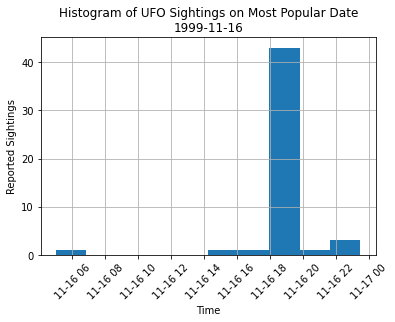

In [127]:
ufo['Date'] = ufo['Time'].dt.date
# print(ufo['Time'].dt.date)

dateStats = ufo['Date'].describe()
# dateStats
dateStats['top']
mostPopularDay = ufo.where(ufo['Date'] == dateStats['top'])
mostPopularDay = mostPopularDay.dropna()


#create coloumn with time
mostPopularDay['TimeOfDay'] = mostPopularDay['Time'].dt.time

#print(mostPopularDay['TimeOfDay'] )

mostPopularDay['TimeOfDay'].value_counts()

# plot
fig, ax = plt.subplots()

# histogram of the times
mostPopularDay.hist(ax=ax, column="Time", xrot=45, figsize=(9, 6))

ax.set_title("Histogram of UFO Sightings on Most Popular Date\n{date}".format(date=dateStats['top']))
ax.yaxis.set_label_text('Reported Sightings')
ax.xaxis.set_label_text('Time')

plt.show() 

### 2.2.3) Do the same for the calendar date with the 2nd most sightings

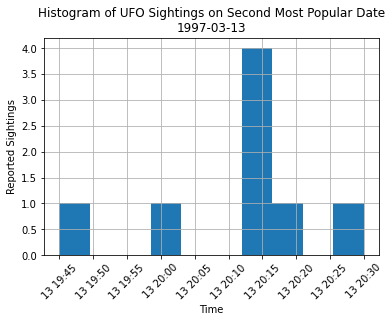

In [135]:
import datetime

ufo['Date'] = ufo['Time'].dt.date
# print(ufo['Date'] )

#second most sightings
#dateStats2 = ufo['Date'].value_counts()[1:2].index.tolist()
dateStats2 = ufo['Date'].value_counts()[1:2]
dateStats2.index
x = datetime.date(1997, 3, 13)
x

mostPopularDay2 = ufo.where(ufo['Date'] == x)
mostPopularDay2 = mostPopularDay2.dropna()


#create coloumn with time
mostPopularDay2['TimeOfDay'] = mostPopularDay2['Time'].dt.time

#print(mostPopularDay2['TimeOfDay'] )

mostPopularDay2['TimeOfDay'].value_counts()

# plot
fig, ax = plt.subplots()

# histogram of the times
mostPopularDay2.hist(ax=ax, column="Time", xrot=45, figsize=(9, 6))

ax.set_title("Histogram of UFO Sightings on Second Most Popular Date\n{date}".format(date=x))
ax.yaxis.set_label_text('Reported Sightings')
ax.xaxis.set_label_text('Time')

plt.show() 

### 2.2.4) For extra credit - Are there any deductions or patterns you see in the data? Justify with plots or data.
One possible idea here, is to answer the opposite question you answered in 2.2.2. (*e.g. if you answered day of week then do calendar date here*); however, we will accept any observations you make here provided you substantiate them with data analysis.

In [133]:
# ufo['Date'] = ufo['Time'].dt.date
# # print(ufo['Time'].dt.date)

# dateStats = ufo['Date'].describe()
# dateStats
# dateStats['top']
# mostPopularDay = ufo.where(ufo['Date'] == dateStats['top'])
# mostPopularDay = mostPopularDay.dropna()


# #create coloumn with time
# mostPopularDay['TimeOfDay'] = mostPopularDay['Time'].dt.time

# #print(mostPopularDay['TimeOfDay'] )

# mostPopularDay['TimeOfDay'].value_counts()

# # plot
# fig, ax = plt.subplots()

# # histogram of the times
# mostPopularDay.hist(ax=ax, column="Time", xrot=45, figsize=(9, 6))

# ax.set_title("Histogram of UFO Sightings on Most Popular Date\n{date}".format(date=dateStats['top']))
# ax.yaxis.set_label_text('Reported Sightings')
# ax.xaxis.set_label_text('Time')

# plt.show() 

count          18241
unique          5576
top       1999-11-16
freq             187
Name: Date, dtype: object